In [1]:
# Import Necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import akinjohnson as akj # A module i created to show me neccessary information
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing the file and droping some columns
file_path = r"C:\Users\DELL\ALT School 2nd Semester\ALT Dataset\crime_data_chicago.csv"
chicago = pd.read_csv(file_path).drop(columns=['Unnamed: 0','Case Number','Year']) #I'm dropping Year because ill still extract it later from the date column

In [3]:
# finding the summary of the dataset
akj.summary(chicago)

1 - Top 5 Records of the dataset
         ID                    Date                 Block  IUCR  \
0   6407111  07/26/2008 02:30:00 PM  085XX S MUSKEGON AVE  1320   
1  11398199  07/31/2018 10:57:00 AM     092XX S ELLIS AVE  143C   
2   5488785  04/27/2007 10:30:00 AM     062XX N TRIPP AVE  0610   
3  11389116  07/23/2018 08:55:00 AM    0000X N KEELER AVE  0560   
4  12420431  07/11/2021 06:40:00 AM   016XX W HARRISON ST  051A   

        Primary Type               Description  \
0    CRIMINAL DAMAGE                TO VEHICLE   
1  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2           BURGLARY            FORCIBLE ENTRY   
3            ASSAULT                    SIMPLE   
4            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  Domestic  Beat  District  \
0                                  STREET   False     False   423       4.0   
1                               POOL ROOM    True     False   413       4.0   
2                         

In [4]:
# i need to see the whole columns and rows, to know what im working with exactly, without it being truncated
# so to show all columns and rows
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 2278726)

In [5]:
# top 1000 rows to see if its still truncating
chicago.head(1000)

ID                    Date                                Block  \
0     6407111  07/26/2008 02:30:00 PM                 085XX S MUSKEGON AVE   
1    11398199  07/31/2018 10:57:00 AM                    092XX S ELLIS AVE   
2     5488785  04/27/2007 10:30:00 AM                    062XX N TRIPP AVE   
3    11389116  07/23/2018 08:55:00 AM                   0000X N KEELER AVE   
4    12420431  07/11/2021 06:40:00 AM                  016XX W HARRISON ST   
5     1699235  08/21/2001 12:00:00 AM                        003XX W 28 PL   
6     5061155  10/14/2006 10:00:00 PM                  006XX S CENTRAL AVE   
7     9876456  12/02/2014 11:48:00 AM                  043XX W POTOMAC AVE   
8     7582927  06/30/2010 01:00:00 AM                   032XX W PIERCE AVE   
9    10566046  06/18/2016 11:15:00 PM               021XX N CALIFORNIA AVE   
10    9466303  01/18/2014 09:00:00 AM                  031XX W WARREN BLVD   
11    6577203  10/26/2008 05:00:00 PM                   058XX S KEDZIE AVE   
12    8373423  11/19/2011 09:00:00 AM                014XX N ELK GROVE AVE   
13    3298634  04/25/2004 04:00:00 PM                   076XX S HALSTED ST   
14    8699049  07/10/2012 07:59:00 AM                  042XX S INDIANA AVE   
15    9522880  03/09/2014 12:30:00 PM                   019XX W MADISON ST   
16   10135550  06/28/2015 03:50:00 AM                    047XX W FULTON ST   
17    3447250  07/23/2004 12:00:00 AM                     009XX W GRACE ST   
18    2681993  04/06/2003 03:00:00 PM                    002XX N LOREL AVE   
19    1932758  01/02/2002 05:00:00 PM                     023XX S STATE ST   
20    7315747  01/14/2010 01:00:00 AM                  022XX N NATCHEZ AVE   
21    2409901  10/19/2002 09:15:00 PM                  133XX S BRANDON AVE   
22    2265520  07/29/2002 11:23:05 AM                036XX S LAKE PARK AVE   
23    6593888  10/23/2008 08:00:00 PM                 003XX S MICHIGAN AVE   
24   10473781  04/04/2016 02:34:00 PM                      001XX W 72ND ST   
25    3376825  06/13/2004 06:00:00 AM                 078XX S PHILLIPS AVE   
26   11143513  11/08/2017 01:10:00 PM                   025XX W BERWYN AVE   
27    3682751  09/05/2004 06:00:00 PM                    077XX S PEORIA ST   
28    9365306  10/26/2013 01:45:00 PM                 008XX N MICHIGAN AVE   
29    7763508  09/30/2010 09:00:00 PM                  0000X W DIVISION ST   
30    1496484  03/20/2001 12:01:00 AM                   065XX S JUSTINE ST   
31    2718013  05/06/2003 10:30:00 PM                    065XX S ELLIS AVE   
32   12037807  04/26/2020 01:55:00 PM             053XX W BLOOMINGDALE AVE   
33   12592835  01/15/2022 03:59:00 AM                  011XX S WESTERN AVE   
34   12252122  12/19/2020 12:00:00 AM                  005XX W DIVISION ST   
35    7712225  09/16/2010 12:00:00 PM                  059XX S KEDVALE AVE   
36   10348890  12/16/2015 05:00:00 PM                   031XX S HALSTED ST   
37    7533272  05/31/2010 05:00:00 PM                   001XX S PULASKI RD   
38   11366391  07/01/2018 11:55:00 PM                    001XX N DAMEN AVE   
39    3332372  05/18/2004 04:30:00 PM                    048XX N AVERS AVE   
40   11846180  09/30/2019 09:20:00 PM                     007XX W 103RD ST   
41    2875093  07/29/2003 10:08:00 AM                   029XX S FEDERAL ST   
42    4529992  01/08/2006 06:55:00 AM                 077XX S PHILLIPS AVE   
43    2275373  08/03/2002 04:00:00 AM                   016XX W ADDISON ST   
44    4166383  07/18/2005 03:15:00 PM                      003XX E 55TH PL   
45   10833453  01/30/2017 12:00:00 PM                   0000X E MADISON ST   
46    4000935  05/16/2005 10:45:00 PM                  029XX S DEARBORN ST   
47   10268476  10/09/2015 04:30:00 PM                   029XX W ADDISON ST   
48   11913974  12/06/2019 11:37:00 PM                   108XX S FOREST AVE   
49    2238839  07/13/2002 09:00:00 PM                024XX W ARTHINGTON ST   
50   10960542  05/27/2017 08:45:0

In [6]:
# lets bring missing values and check thoroughly
chicago.isnull().sum()

ID                           0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [7]:
# filling the Ward column with the mean
chicago['Ward'].fillna(chicago.Ward.mean(), inplace=True)
chicago.isnull().sum()

ID                           0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                         0
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [8]:
# filling the Community Area column with the mean
chicago['Community Area'].fillna(chicago['Community Area'].mean(), inplace=True)
chicago.isnull().sum()

ID                          0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     2877
Arrest                      0
Domestic                    0
Beat                        0
District                   12
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            23985
Y Coordinate            23985
Updated On                  0
Latitude                23985
Longitude               23985
Location                23985
dtype: int64

In [9]:
# filling the Community Area column with the mean
chicago['District'].fillna(chicago['District'].mean(), inplace=True)
chicago.isnull().sum()

ID                          0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     2877
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            23985
Y Coordinate            23985
Updated On                  0
Latitude                23985
Longitude               23985
Location                23985
dtype: int64

In [10]:
# filling the Location Description column with NO LOCATION DESCRIPTION
chicago['Location Description'].fillna('NO LOCATION DESCRIPTION', inplace=True)
chicago.isnull().sum()

ID                          0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            23985
Y Coordinate            23985
Updated On                  0
Latitude                23985
Longitude               23985
Location                23985
dtype: int64

In [11]:
# filling the Location column with NO LOCATION
chicago['Location'].fillna('NO LOCATION', inplace=True)
chicago.isnull().sum()

ID                          0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            23985
Y Coordinate            23985
Updated On                  0
Latitude                23985
Longitude               23985
Location                    0
dtype: int64

# drop missing values
I'm droping the remaining missing values because i dont think there is a way to fill in coordinates. Filling it up with the mean, median, or mode doesn't actually gives us the presise coordinate. So I propose we just drop the missing values

In [12]:
chicago.dropna(subset=['X Coordinate','Y Coordinate','Latitude','Longitude'], inplace=True)

In [13]:
chicago.isna().sum()

ID                      0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

# SEPERATING THE DATE COLUMN

In [14]:
'''# Converting the 'Date' and 'Updated On' columns to datetime format using the specified format.
chicago['Date'] = pd.to_datetime(chicago['Date'], format='%m/%d/%Y %I:%M:%S %p')
#chicago['Updated On'] = pd.to_datetime(chicago['Updated On'], format='%m/%d/%Y %H:%M:%S %p')

# Extracting additional date information and adding new columns to the DataFrame.
chicago['Day'] = chicago['Date'].dt.day_name()
chicago['Day of the Month'] = chicago['Date'].dt.day
chicago['Month'] = chicago['Date'].dt.month_name()
chicago['Year'] = chicago['Date'].dt.year

# Binning and labeling the seasons based on the month of the year.
bins = [0, 2, 5, 8, 11, 12]
labels = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']
chicago['Season'] = pd.cut(chicago['Date'].dt.month, bins=bins, labels=labels, ordered=False)

# Defining a function to classify the time period based on the hour of the day.
def classify_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Applying the classify_time function to create a new column 'Time Period' in the DataFrame.
chicago['Time Period'] = chicago['Date'].dt.hour.apply(classify_time)

# # Dropping the 'Hour' column as it's no longer needed.
# chicago.drop('Hour', axis=1, inplace=True)'''

"# Converting the 'Date' and 'Updated On' columns to datetime format using the specified format.\nchicago['Date'] = pd.to_datetime(chicago['Date'], format='%m/%d/%Y %I:%M:%S %p')\n#chicago['Updated On'] = pd.to_datetime(chicago['Updated On'], format='%m/%d/%Y %H:%M:%S %p')\n\n# Extracting additional date information and adding new columns to the DataFrame.\nchicago['Day'] = chicago['Date'].dt.day_name()\nchicago['Day of the Month'] = chicago['Date'].dt.day\nchicago['Month'] = chicago['Date'].dt.month_name()\nchicago['Year'] = chicago['Date'].dt.year\n\n# Binning and labeling the seasons based on the month of the year.\nbins = [0, 2, 5, 8, 11, 12]\nlabels = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']\nchicago['Season'] = pd.cut(chicago['Date'].dt.month, bins=bins, labels=labels, ordered=False)\n\n# Defining a function to classify the time period based on the hour of the day.\ndef classify_time(hour):\n    if 5 <= hour < 12:\n        return 'Morning'\n    elif 12 <= hour < 17:\n    

In [15]:
# Convert date column to datetime
chicago['Date'] = pd.to_datetime(chicago['Date'])

# Extract day, date, month, and year
chicago['Day'] = chicago['Date'].dt.day_name()
chicago['Month_day'] = chicago['Date'].dt.day
chicago['Month'] = chicago['Date'].dt.month
chicago['Year'] = chicago['Date'].dt.year

In [16]:
chicago.head()

ID                Date                 Block  IUCR  \
0   6407111 2008-07-26 14:30:00  085XX S MUSKEGON AVE  1320   
1  11398199 2018-07-31 10:57:00     092XX S ELLIS AVE  143C   
2   5488785 2007-04-27 10:30:00     062XX N TRIPP AVE  0610   
3  11389116 2018-07-23 08:55:00    0000X N KEELER AVE  0560   
4  12420431 2021-07-11 06:40:00   016XX W HARRISON ST  051A   

        Primary Type               Description  \
0    CRIMINAL DAMAGE                TO VEHICLE   
1  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2           BURGLARY            FORCIBLE ENTRY   
3            ASSAULT                    SIMPLE   
4            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  Domestic  Beat  District  \
0                                  STREET   False     False   423       4.0   
1                               POOL ROOM    True     False   413       4.0   
2                               RESIDENCE    True     False  1711      17.0   
3            NURSING HOME/RETIREMENT HOME   False     False  1115      11.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  1231      12.0   

   Ward  Community Area FBI Code  X Coordinate  Y Coordinate  \
0  10.0            46.0       14     1196638.0     1848800.0   
1   8.0            47.0       15     1184499.0     1843935.0   
2  39.0            12.0       05     1146911.0     1941022.0   
3  28.0            26.0      08A     1148388.0     1899882.0   
4  27.0            28.0      04A     1165430.0     1897441.0   

               Updated On   Latitude  Longitude  \
0  02/28/2018 03:56:25 PM  41.739980 -87.555120   
1  08/07/2018 04:02:59 PM  41.726922 -87.599747   
2  02/28/2018 03:56:25 PM  41.994138 -87.734959   
3  07/30/2018 03:52:24 PM  41.881217 -87.730590   
4  07/18/2021 04:56:02 PM  41.874174 -87.668082   

                        Location       Day  Month_day  Month  Year  
0  (41.739979622, -87.555120042)  Saturday         26      7  2008  
1  (41.726922145, -87.599746995)   Tuesday         31      7  2018  
2  (41.994137622, -87.734959049)    Friday         27      4  2007  
3  (41.881217483, -87.730589961)    Monday         23      7  2018  
4  (41.874173691, -87.668082118)    Sunday         11      7  2021

# CLEANING THE LOCATION DESCRIPTION COLUMN

I noticed some irregularities in naming the Location description

In [17]:
print(chicago.groupby('Location Description')['Location Description'].count())
print(chicago.groupby('Location Description')['Location Description'].nunique().sum())#NUM OF UNIQUE VALUES BEFORE CLEANING

Location Description
ABANDONED BUILDING                                         3461
AIRCRAFT                                                    228
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA             359
AIRPORT BUILDING NON-TERMINAL - SECURE AREA                 221
AIRPORT EXTERIOR - NON-SECURE AREA                          288
AIRPORT EXTERIOR - SECURE AREA                              130
AIRPORT PARKING LOT                                         317
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA              620
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA                  256
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA                 28
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA              287
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA                 1403
AIRPORT TRANSPORTATION SYSTEM (ATS)                          25
AIRPORT VENDING ESTABLISHMENT                               267
AIRPORT/AIRCRAFT                                           4789
ALLEY              

In [18]:
chicago['Location Description'] =chicago['Location Description'].replace({'AUTO':'AUTO / BOAT / RV DEALERSHIP',
                                                                          'BARBERSHOP':'BARBER SHOP/BEAUTY SALON',
                                                                          'BOAT/WATERCRAFT':'BOAT / WATERCRAFT',
                                                                          'CHA HALLWAY/STAIRWELL/ELEVATOR':'CHA HALLWAY / STAIRWELL / ELEVATOR',
                                                                          'CHA HALLWAY':'CHA HALLWAY / STAIRWELL / ELEVATOR',
                                                                          'CHA PARKING LOT':'CHA PARKING LOT / GROUNDS',
                                                                          'CHA PARKING LOT/GROUNDS':'CHA PARKING LOT / GROUNDS',
                                                                          'CHURCH':'CHURCH / SYNAGOGUE / PLACE OF WORSHIP',
                                                                          'CHURCH/SYNAGOGUE/PLACE OF WORSHIP':'CHURCH / SYNAGOGUE / PLACE OF WORSHIP',
                                                                          'COLLEGE/UNIVERSITY GROUNDS':'COLLEGE / UNIVERSITY - GROUNDS',
                                                                          'COLLEGE/UNIVERSITY RESIDENCE HALL':'COLLEGE / UNIVERSITY - RESIDENCE HALL',
                                                                          'CTA BUS':'CTA BUS STOP',
                                                                          'CTA GARAGE / OTHER PROPERTY':'CTA PARKING LOT / GARAGE / OTHER PROPERTY',
                                                                          'DRIVEWAY - RESIDENTIAL':'DRIVEWAY',
                                                                          'FACTORY':'FACTORY / MANUFACTURING BUILDING',
                                                                          'FACTORY/MANUFACTURING BUILDING':'FACTORY / MANUFACTURING BUILDING',
                                                                          'GARAGE':'GARAGE/AUTO REPAIR',
                                                                          'GAS STATION':'GAS STATION DRIVE/PROP.',
                                                                          'GOVERNMENT BUILDING':'GOVERNMENT BUILDING / PROPERTY',
                                                                          'GOVERNMENT BUILDING/PROPERTY':'GOVERNMENT BUILDING / PROPERTY',
                                                                          'HIGHWAY/EXPRESSWAY':'HIGHWAY / EXPRESSWAY',
                                                                          'HOSPITAL':'HOSPITAL BUILDING / GROUNDS',
                                                                          'HOSPITAL BUILDING/GROUNDS':'HOSPITAL BUILDING / GROUNDS',
                                                                          'HOTEL':'HOTEL / MOTEL',
                                                                          'HOTEL/MOTEL':'HOTEL / MOTEL',
                                                                          'LAKE':'LAKEFRONT / WATERFRONT / RIVERBANK',
                                                                          'LAKEFRONT/WATERFRONT/RIVERBANK':'LAKEFRONT / WATERFRONT / RIVERBANK',
                                                                          'MEDICAL/DENTAL OFFICE':'MEDICAL / DENTAL OFFICE',
                                                                          'MOVIE HOUSE/THEATER':'MOVIE HOUSE / THEATER',
                                                                          'NURSING HOME':'NURSING HOME / RETIREMENT HOME',
                                                                          'NURSING HOME/RETIREMENT HOME':'NURSING HOME / RETIREMENT HOME',
                                                                          'NURSING / RETIREMENT HOME':'NURSING HOME / RETIREMENT HOME',
                                                                          'OTHER RAILROAD PROP / TRAIN DEPOT':'OTHER RAILROAD PROPERTY / TRAIN DEPOT',
                                                                          'PARKING LOT':'PARKING LOT / GARAGE (NON RESIDENTIAL)',
                                                                          'PARKING LOT/GARAGE(NON.RESID.)':'PARKING LOT / GARAGE (NON RESIDENTIAL)',
                                                                          'POLICE FACILITY/VEH PARKING LOT':'POLICE FACILITY / VEHICLE PARKING LOT',
                                                                          'POOL ROOM':'POOLROOM',
                                                                          'RESIDENCE PORCH/HALLWAY':'RESIDENCE - PORCH / HALLWAY',
                                                                          'RESIDENCE-GARAGE':'RESIDENCE - GARAGE',
                                                                          'RESIDENTIAL YARD (FRONT/BACK)':'RESIDENCE - YARD (FRONT / BACK)',
                                                                          'SCHOOL, PRIVATE, BUILDING':'SCHOOL - PRIVATE BUILDING',
                                                                          'SCHOOL, PRIVATE, GROUNDS':'SCHOOL - PRIVATE GROUNDS',
                                                                          'SCHOOL, PUBLIC, BUILDING':'SCHOOL - PUBLIC BUILDING',
                                                                          'SCHOOL, PUBLIC, GROUNDS':'SCHOOL - PUBLIC GROUNDS',
                                                                          'SPORTS ARENA/STADIUM':'SPORTS ARENA / STADIUM',
                                                                          'TAVERN/LIQUOR STORE':'TAVERN / LIQUOR STORE',
                                                                          'TAVERN':'TAVERN / LIQUOR STORE',
                                                                          'TAXICAB':'TAXI CAB',
                                                                          'TRUCK':'TRUCKING TERMINAL',
                                                                          'VACANT LOT':'VACANT LOT / LAND',
                                                                          'VACANT LOT/LAND':'VACANT LOT / LAND',
                                                                          'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS':'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS',
                                                                          'VEHICLE - COMMERCIAL: TROLLEY BUS':'VEHICLE-COMMERCIAL - TROLLEY BUS',
                                                                          'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)':'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)',
                                                                          'VEHICLE-COMMERCIAL':'VEHICLE - COMMERCIAL',
                                                                          'VEHICLE - OTHER RIDE SERVICE':'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)'
                                                                           })

In [19]:
print(chicago.groupby('Location Description')['Location Description'].count())
print(chicago.groupby('Location Description')['Location Description'].nunique().sum())#NUM OF UNIQUE VALUES AFTER CLEANING

Location Description
ABANDONED BUILDING                                         3461
AIRCRAFT                                                    228
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA             359
AIRPORT BUILDING NON-TERMINAL - SECURE AREA                 221
AIRPORT EXTERIOR - NON-SECURE AREA                          288
AIRPORT EXTERIOR - SECURE AREA                              130
AIRPORT PARKING LOT                                         317
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA              620
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA                  256
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA                 28
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA              287
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA                 1403
AIRPORT TRANSPORTATION SYSTEM (ATS)                          25
AIRPORT VENDING ESTABLISHMENT                               267
AIRPORT/AIRCRAFT                                           4789
ALLEY              

# CLEANING THE PRIMARY TYPE COLUMN

I noticed some irregularities in naming the primary type

In [20]:
print(chicago.groupby('Primary Type')['Primary Type'].count())
print(chicago.groupby('Primary Type')['Primary Type'].nunique().sum())#NUM OF UNIQUE VALUES BEFORE CLEANING

Primary Type
ARSON                                  3865
ASSAULT                              147050
BATTERY                              416912
BURGLARY                             124679
CONCEALED CARRY LICENSE VIOLATION       304
CRIM SEXUAL ASSAULT                    7904
CRIMINAL DAMAGE                      258652
CRIMINAL SEXUAL ASSAULT                1415
CRIMINAL TRESPASS                     63201
DECEPTIVE PRACTICE                    94512
GAMBLING                               4308
HOMICIDE                               3597
HUMAN TRAFFICKING                        28
INTERFERENCE WITH PUBLIC OFFICER       5477
INTIMIDATION                           1385
KIDNAPPING                             2155
LIQUOR LAW VIOLATION                   4420
MOTOR VEHICLE THEFT                  104920
NARCOTICS                            219441
NON - CRIMINAL                           12
NON-CRIMINAL                             44
NON-CRIMINAL (SUBJECT SPECIFIED)          2
OBSCENITY          

In [21]:
chicago['Primary Type'] =chicago['Primary Type'].replace({'NON-CRIMINAL':'NON - CRIMINAL',
                                                          'NON-CRIMINAL (SUBJECT SPECIFIED)':'NON - CRIMINAL'
                                                         })

In [22]:
print(chicago.groupby('Primary Type')['Primary Type'].count())
print(chicago.groupby('Primary Type')['Primary Type'].nunique().sum())#NUM OF UNIQUE VALUES AFTER CLEANING

Primary Type
ARSON                                  3865
ASSAULT                              147050
BATTERY                              416912
BURGLARY                             124679
CONCEALED CARRY LICENSE VIOLATION       304
CRIM SEXUAL ASSAULT                    7904
CRIMINAL DAMAGE                      258652
CRIMINAL SEXUAL ASSAULT                1415
CRIMINAL TRESPASS                     63201
DECEPTIVE PRACTICE                    94512
GAMBLING                               4308
HOMICIDE                               3597
HUMAN TRAFFICKING                        28
INTERFERENCE WITH PUBLIC OFFICER       5477
INTIMIDATION                           1385
KIDNAPPING                             2155
LIQUOR LAW VIOLATION                   4420
MOTOR VEHICLE THEFT                  104920
NARCOTICS                            219441
NON - CRIMINAL                           58
OBSCENITY                               215
OFFENSE INVOLVING CHILDREN            15266
OTHER NARCOTIC VIOL

# CLEANING THE DESCRIPTION COLUMN

I noticed some irregularities in naming the description

In [23]:
print(chicago.groupby('Description')['Description'].count())
print(chicago.groupby('Description')['Description'].nunique().sum())#NUM OF UNIQUE VALUES BEFORE CLEANING

Description
$300 AND UNDER                                                       3
$500 AND UNDER                                                  183267
ABUSE / NEGLECT - CARE FACILITY                                      9
ABUSE/NEGLECT: CARE FACILITY                                        43
ADULTRY                                                              1
AGG CRIM SEX ABUSE FAM MEMBER                                      798
AGG CRIMINAL SEXUAL ABUSE                                         1556
AGG PO HANDS ETC SERIOUS INJ                                       163
AGG PO HANDS NO/MIN INJURY                                        6299
AGG PRO EMP HANDS SERIOUS INJ                                      156
AGG PRO.EMP: HANDGUN                                               147
AGG PRO.EMP: OTHER DANG WEAPON                                     782
AGG PRO.EMP: OTHER FIREARM                                          37
AGG PRO.EMP:KNIFE/CUTTING INST                                   

In [24]:
# renaming values in the Description column properly
chicago['Description'] =chicago['Description'].replace({'UNLAWFUL POSS AMMUNITION': 'UNLAWFUL POSSESSION - AUMMUNITION',
                                                        'UNLAWFUL POSS OTHER FIREARM': 'UNLAWFUL POSSESSION - OTHER FIREARM',
                                                        'UNLAWFUL POSS OF HANDGUN': 'UNLAWFUL POSSESSION - HANDGUN',
                                                        'ARMED: HANDGUN': 'ARMED - HANDGUN',
                                                        '$300 AND UNDER': '$500 AND UNDER',
                                                        'ABUSE/NEGLECT: CARE FACILITY': 'ABUSE/NEGLECT: CARE FACILITY',
                                                        'AGG CRIM SEX ABUSE FAM MEMBER': 'AGGRAVATED -CCRIMINAL SEXUAL ABUSE',
                                                        'AGG CRIMINAL SEXUAL ABUSE': 'AGGRAVATED - CRIMINAL SEXUAL ABUSE',
                                                        'AGG PO HANDS ETC SERIOUS INJ': 'AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, SERIOUS INJURY',
                                                        'AGG PO HANDS NO/MIN INJURY': 'AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, NO INJURY',
                                                        'AGG PRO EMP HANDS SERIOUS INJ': 'AGGRAVATED PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY',
                                                        'AGG PRO.EMP: HANDGUN': 'AGGRAVATED PROTECTED EMPLOYEE - HANDGUN',
                                                        'AGG PRO.EMP: OTHER DANG WEAPON': 'AGGRAVATED - OTHER DANG WEAPON',
                                                        'AGGRAVATED: OTHER DANG WEAPON': 'AGGRAVATED - OTHER DANG WEAPON',
                                                        'AGG PRO.EMP: OTHER FIREARM': 'AGGRAVATED PROTECTED EMPLOYEE - OTHER FIREARM',
                                                        'AGG PRO.EMP:KNIFE/CUTTING INST': 'AGGRAVATED PROTECTED EMPLOYEE - KNIFE/CUTTING INSTRUMENT',
                                                        'AGGRAVATED PROTECTED EMPLOYEE - KNIFE / CUTTING INSTRUMENT': 'AGGRAVATED PROTECTED EMPLOYEE - KNIFE/CUTTING INSTRUMENT',
                                                        'AGG: HANDS/FIST/FEET NO/MINOR INJURY': 'AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY',
                                                        'AGG: HANDS/FIST/FEET SERIOUS INJURY': 'AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY',
                                                        'AGG. RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY': 'AGGRAVATED RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY',
                                                        'AGG. RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY': 'AGGRAVATED RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY',
                                                        'AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY': 'AGGRAVATED RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY',
                                                        'AGG RIT MUT: HANDS/FIST/FEET NO/MINOR INJURY': 'AGGRAVATED RITUAL MUTILATION - HANDS, FISTS, FEET, NO INJURY',
                                                        'ABUSE/NEGLECT: CARE FACILITY': 'ABUSE / NEGLECT - CARE FACILITY',
                                                        'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY': 'AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY',
                                                        'AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY': 'AGGRAVATED PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY',
                                                        'AGG RITUAL MUT:KNIFE/CUTTING I': 'AGGRAVATED RITUAL MUTILATION - KNIFE/CUTTING I',
                                                        'AGG SEX ASSLT OF CHILD FAM MBR': 'AGGRAVATED SEXUAL ASSAULT - CHILD FAMILY MEMBER',
                                                        'AGG: FINANCIAL ID THEFT': 'AGGRAVATED FINANCIAL - IDENTITY THEFT',
                                                        'AGGRAVATED FINANCIAL IDENTITY THEFT': 'AGGRAVATED FINANCIAL - IDENTITY THEFT',
                                                        'AGGRAVATED -CCRIMINAL SEXUAL ABUSE': 'AGGRAVATED - CRIMINAL SEXUAL ABUSE',
                                                        'AGGRAVATED CRIMINAL SEXUAL ABUSE': 'AGGRAVATED - CRIMINAL SEXUAL ABUSE',
                                                        'AGGRAVATED - OTHER DANG WEAPON': 'AGGRAVATED - OTHER DANGEROUS WEAPON',
                                                        'AGGRAVATED COMPUTER TAMPERING': 'AGGRAVATED - COMPUTER TAMPERING',
                                                        'AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER': 'AGGRAVATED - CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER',
                                                        'AGGRAVATED DOMESTIC BATTERY: HANDGUN': 'AGGRAVATED DOMESTIC BATTERY - HANDGUN',
                                                        'AGGRAVATED DOMESTIC BATTERY: KNIFE / CUTTING INSTSTRUMENT': 'AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT',
                                                        'AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST':'AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT',
                                                        'AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON':'AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON',
                                                        'AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM':'AGGRAVATED DOMESTIC BATTERY - OTHER FIREARM',
                                                        'AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY':'AGGRAVATED DOMESTIC BATTERY - HANDS/FIST/FEET SERIOUS INJURY',
                                                        'AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY':'AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, NO/MINOR INJURY',
                                                        'AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, NO INJURY':'AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, NO/MINOR INJURY',
                                                        'AGGRAVATED P.O. - HANDS, FISTS, FEET, SERIOUS INJURY':'AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, SERIOUS INJURY',
                                                        'AGGRAVATED PO: HANDGUN':'AGGRAVATED POLICE OFFICER - HANDGUN',
                                                        'AGGRAVATED PO: OTHER DANG WEAP':'AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WEAPON',
                                                        'AGGRAVATED PO: KNIFE/CUT INSTR':'AGGRAVATED POLICE OFFICER - KNIFE / CUTTING INSTRUMENT',
                                                        'AGGRAVATED PO:KNIFE/CUT INSTR':'AGGRAVATED POLICE OFFICER - KNIFE / CUTTING INSTRUMENT',
                                                        'AGGRAVATED PO: OTHER FIREARM':'AGGRAVATED POLICE OFFICER - OTHER FIREARM',
                                                        'AGGRAVATED: HANDGUN':'AGGRAVATED - HANDGUN',
                                                        'AGGRAVATED: KNIFE/CUT INSTR':'AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
                                                        'AGGRAVATED: OTHER':'AGGRAVATED - OTHER',
                                                        'AGGRAVATED: OTHER FIREARM':'AGGRAVATED - OTHER FIREARM',
                                                        'AGGRAVATED:KNIFE/CUTTING INSTR':'AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
                                                        'AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER':'AGGRAVATED SEXUAL ASSAULT - CHILD FAMILY MEMBER',
                                                        'AGGRAVATED OF A CHILD':'AGGRAVATED - CHILD',
                                                        'AGGRAVATED OF A SENIOR CITIZEN': 'AGGRAVATED - SENIOR CITIZEN',
                                                        'AGGRAVATED OF A UNBORN CHILD': 'AGGRAVATED - UNBORN CHILD',
                                                        'AGGRAVATED OF AN UNBORN CHILD': 'AGGRAVATED - UNBORN CHILD',
                                                        'AGGRAVATED VEHICULAR HIJACKING':'AGGRAVATED - VEHICLE HIJACKING',
                                                        'AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY':'AGGRAVATED DOMESTIC BATTERY - HANDS/FIST/FEET SERIOUS INJURY',
                                                        'AGGRAVATED -CCRIMINAL SEXUAL ABUSE':'AGGRAVATED - CRIMINAL SEXUAL ABUSE',
                                                        'ALTER / FORGE PRESCRIPTION':'ALTER/FORGE PRESCRIPTION',
                                                        'ANIMAL ABUSE / NEGLECT':'ANIMAL ABUSE/NEGLECT',
                                                        'ARMED VIOLENCE':'ARMED - VIOLENCE',
                                                        'ARMED WHILE UNDER THE INFLUENCE':'ARMED - UNDER THE INFLUENCE',
                                                        'ARMED: OTHER FIREARM':'ARMED - OTHER FIREARM',
                                                        'ARMED: OTHER DANGEROUS WEAPON':'ARMED - OTHER DANGEROUS WEAPON',
                                                        'ARMED:KNIFE/CUTTING INSTRUMENT':'ARMED - KNIFE / CUTTING INSTRUMENT',
                                                        'ARSON THREAT':'ARSONIST THREAT',
                                                        'ARSONIST: ANNUAL REGISTRATION':'ARSONIST - ANNUAL REGISTRATION',
                                                        'ARSONIST: DUTY TO REGISTER':'ARSONIST - DUTY TO REGISTER',
                                                        'ARSONIST: FAIL TO REGISTER NEW ADDRESS':'ARSONIST - FAIL TO REGISTER NEW ADDRESS',
                                                        'ATTEMPT AGG: HANDGUN':'ATTEMPT AGGRAVATED - HANDGUN',
                                                        'ATTEMPT AGG: KNIFE/CUT INSTR':'ATTEMPT AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
                                                        'ATTEMPT AGG: OTHER':'ATTEMPT AGGRAVATED - OTHER',
                                                        'ATTEMPT AGG: OTHER DANG WEAPON':'ATTEMPT AGGRAVATED - OTHER DANGEROUS WEAPON',
                                                        'ATTEMPT: AGGRAVATED': 'ATTEMPT AGGRAVATED',
                                                        'ATTEMPT: ARMED-HANDGUN':'ATTEMPT ARMED - HANDGUN',
                                                        'ATTEMPT: ARMED-KNIFE/CUT INSTR': 'ATTEMPT ARMED - KNIFE / CUTTING INSTRUMENT',
                                                        'ATTEMPT: ARMED-OTHER DANG WEAP': 'ATTEMPT ARMED - OTHER DANGEROUS WEAPON',
                                                        'ATTEMPT: ARMED-OTHER FIREARM': 'ATTEMPT ARMED - OTHER FIREARM',
                                                        'ATTEMPT: CYCLE, SCOOTER, BIKE NO VIN': 'ATTEMPT - CYCLE, SCOOTER, BIKE, NO VIN',
                                                        'ATTEMPT: CYCLE, SCOOTER, BIKE W-VIN': 'ATTEMPT - CYCLE, SCOOTER, BIKE, W VIN',
                                                        'ATTEMPT: STRONGARM-NO WEAPON': 'ATTEMPT STRONGARM - NO WEAPON',
                                                        'CHILD ABDUCTION/STRANGER':'CHILD ABDUCTION / STRANGER',
                                                        'CONT SUBS:FAIL TO MAINT RECORD':'CONTRABAND SUBS - FAIL TO MAINTAIN RECORD',
                                                        'CRIM SEX ABUSE BY FAM MEMBER':'CRIMINAL SEX ABUSE - FAMILY MEMBER',
                                                        'DEFACE IDENT MARKS OF FIREARM':'DEFACE IDENTIFICATION MARKS OF FIREARM',
                                                        'DEL CONT SUBS TO PERSON <18':'DELIVER CONTRABAND SUBSTANCES - UNDER 18',
                                                        'DELIVER CANNABIS TO PERSON <18':'DELIVER CANNABIS - UNDER 18',
                                                        'DELIVER CANNABIS TO PERSON UNDER 18':'DELIVER CANNABIS - UNDER 18',
                                                        'ENDANGERING LIFE / HEALTH OF CHILD':'ENDANGERING LIFE/HEALTH CHILD',
                                                        'FALSE / STOLEN / ALTERED TRP':'FALSE/STOLEN/ALTERED TRP',
                                                        'FINAN EXPLOIT-ELDERLY/DISABLED':'FINANCIAL EXPLOITATION-ELDERLY/DISABLED',
                                                        'FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABLED PERSON':'FINANCIAL EXPLOITATION-ELDERLY/DISABLED',
                                                        'FINANCIAL ID THEFT: OVER $300':'FINANCIAL ID THEFT - OVER $300',
                                                        'FINANCIAL ID THEFT:$300 &UNDER':'FINANCIAL ID THEFT - UNDER $300',
                                                        'FINANCIAL IDENTITY THEFT $300 AND UNDER':'FINANCIAL ID THEFT - UNDER $300',
                                                        'FINANCIAL IDENTITY THEFT OVER $ 300':'FINANCIAL ID THEFT - OVER $300',
                                                        'FINANCIAL IDENTITY THEFT: OVER $300':'FINANCIAL ID THEFT - OVER $300',
                                                        'FROM COIN-OP MACHINE/DEVICE':'FROM COIN-OPERATED MACHINE OR DEVICE',
                                                        'GAME/AMUSEMENT DEVICE':'GAME - AMUSEMENT DEVICE, CARDS, DICE',
                                                        'GAME/CARDS':'GAME - AMUSEMENT DEVICE, CARDS, DICE',
                                                        'GAME/DICE':'GAME - AMUSEMENT DEVICE, CARDS, DICE',
                                                        'GUN OFFENDER: ANNUAL REGISTRATION':'GUN OFFENDER - ANNUAL REGISTRATION',
                                                        'GUN OFFENDER: DUTY TO REGISTER':'GUN OFFENDER - DUTY TO REGISTER',
                                                        'GUN OFFENDER: DUTY TO REPORT CHANGE OF INFORMATION':'GUN OFFENDER - DUTY TO REPORT CHANGE OF INFORMATION',
                                                        'GUN OFFENDER NOTIFICATION-NO CONTACT':'GUN OFFENDER - NO CONTACT',
                                                        'INDECENT SOLICITATION OF A CHILD':'INDECENT SOLICITATION/CHILD',
                                                        'INDECENT SOLICITATION OF AN ADULT':'INDECENT SOLICITATION/ADULT',
                                                        'INTERFERE W/ EMERGENCY EQUIP':'INTERFERE WITH EMERGENCY EQUIPMENT',
                                                        'INTERFERE W/ HIGHER EDUCATION':'INTERFERE WITH HIGHER EDUCATION',
                                                        'MANU/DEL:CANNABIS 10GM OR LESS':'MANUFACTURE / DELIVER - CANNABIS UNDER 10GRAMS',
                                                        'MANU/DEL:CANNABIS OVER 10 GMS':'MANUFACTURE / DELIVER - CANNABIS OVER 10GRAMS',
                                                        'MANU/DELIVER: HALLUCINOGEN':'MANUFACTURE / DELIVER - HALLUCINOGEN',
                                                        'MANU/DELIVER: HEROIN (WHITE)':'MANUFACTURE / DELIVER -  HEROIN (WHITE)',
                                                        'MANU/DELIVER: HEROIN(BRN/TAN)':'MANUFACTURE / DELIVER - HEROIN (TAN / BROWN TAR)',
                                                        'MANU/DELIVER: METHAMPHETAMINES':'MANUFACTURE / DELIVER - METHAMPHETAMINE',
                                                        'MANU/DELIVER:AMPHETAMINES':'MANUFACTURE / DELIVER - AMPHETAMINES',
                                                        'MANU/DELIVER:BARBITUATES':'MANUFACTURE / DELIVER - BARBITURATES',
                                                        'MANU/DELIVER:COCAINE':'MANUFACTURE / DELIVER - COCAINE',
                                                        'MANU/DELIVER:CRACK':'MANUFACTURE / DELIVER - CRACK',
                                                        'MANU/DELIVER:HEROIN(BLACK TAR)':'MANUFACTURE / DELIVER - HEROIN (BLACK TAR)',
                                                        'MANU/DELIVER:LOOK-ALIKE DRUG': 'MANUFACTURE / DELIVER - LOOKALIKE DRUG',
                                                        'MANU/DELIVER:PCP':'MANUFACTURE / DELIVER - PCP',
                                                        'MANU/DELIVER:SYNTHETIC DRUGS':'MANUFACTURE / DELIVER - SYNTHETIC DRUGS',
                                                        'MANU/POSS. W/INTENT TO DELIVER: SYNTHETIC MARIJUANA':'MANUFACTURE / DELIVER - SYNTHETIC MARIJUANA',
                                                        'MANUFACTURE / DELIVER - CANNABIS 10 GRAMS OR LESS':'MANUFACTURE / DELIVER - CANNABIS UNDER 10GRAMS',
                                                        'MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS':'MANUFACTURE / DELIVER - CANNABIS OVER 10GRAMS',
                                                        'NON-CONSENSUAL DISSEMINATION OF PRIVATE SEXUAL IMAGES':'NON-CONSENSUAL DISSEMINATIOM - PRIVATE SEXUAL IMAGE',
                                                        'NON-CONSENSUAL DISSEMINATION PRIVATE SEXUAL IMAGES':'NON-CONSENSUAL DISSEMINATIOM - PRIVATE SEXUAL IMAGE',
                                                        'OF UNBORN CHILD':'OF AN UNBORN CHILD',
                                                        'OTHER ARSON / EXPLOSIVE INCIDENT':'OTHER ARSON/EXPLOSIVE INCIDENT',
                                                        'OVER $500':'OVER $300',
                                                        'POSS: PCP':'POSSESSION - PCP',
                                                        'POSS: SYNTHETIC DRUGS':'POSSESSION - SYNTHETIC DRUGS',
                                                        'POSSESS - PCP':'POSSESSION - PCP',
                                                        'POSSESS - SYNTHETIC DRUGS':'POSSESSION - SYNTHETIC DRUGS',
                                                        'POS: PORNOGRAPHIC PRINT':'POSSESSION - PORNOGRAPHIC PRINT',
                                                        'POSSESSION OF DRUG EQUIPMENT':'POSSESSION - DRUG EQUIPMENT',
                                                        'POSSESSION OF PORNOGRAPHIC PRINT':'POSSESSION - PORNOGRAPHIC PRINT',
                                                        'POSS: HEROIN(BLACK TAR)':'POSSESSION - HEROIN (BLACK TAR)',
                                                        'POSS: HEROIN(BRN/TAN)':'POSSESSION - HEROIN (TAN / BROWN TAR)',
                                                        'POSS: HEROIN(WHITE)':'POSSESSION - HEROIN (WHITE)',
                                                        'POSSESS - HEROIN (BLACK TAR)':'POSSESSION - HEROIN (BLACK TAR)',
                                                        'POSSESS - HEROIN (TAN / BROWN TAR)':'POSSESSION - HEROIN (TAN / BROWN TAR)',
                                                        'POSSESS - HEROIN (WHITE)':'POSSESSION - HEROIN (WHITE)',
                                                        'POSS: CANNABIS 30GMS OR LESS':'POSSESSION - CANNABIS UNDER 30GRAMS',
                                                        'POSS: CANNABIS MORE THAN 30GMS':'POSSESSION - CANNABIS OVER 30GRAMS',
                                                        'POSSESS - CANNABIS 30 GRAMS OR LESS':'POSSESSION - CANNABIS UNDER 30GRAMS',
                                                        'POSSESS - CANNABIS MORE THAN 30 GRAMS':'POSSESSION - CANNABIS OVER 30GRAMS',
                                                        'POSS: AMPHETAMINES':'POSSESSION - AMPHETAMINES',
                                                        'POSS: BARBITUATES':'POSSESSION - BARBITURATES',
                                                        'POSS: COCAINE':'POSSESSION - COCAINE',
                                                        'POSS: CRACK':'POSSESSION - CRACK',
                                                        'POSS: HALLUCINOGENS':'POSSESSION - HALLUCINOGENS',
                                                        'POSS: LOOK-ALIKE DRUGS':'POSSESSION - LOOKALIKE DRUGS',
                                                        'POSS: METHAMPHETAMINES':'POSSESSION - METHAMPHETAMINE',
                                                        'POSSESS - AMPHETAMINES':'POSSESSION - AMPHETAMINES',
                                                        'POSSESS - BARBITURATES':'POSSESSION - BARBITURATES',
                                                        'POSSESS - COCAINE':'POSSESSION - COCAINE',
                                                        'POSSESS - CRACK':'POSSESSION - CRACK',
                                                        'POSSESS - HALLUCINOGENS':'POSSESSION - HALLUCINOGENS',
                                                        'POSSESS - METHAMPHETAMINE':'POSSESSION - METHAMPHETAMINE',
                                                        'POSSESS FIREARM / AMMUNITION - NO FOID CARD':'POSSESSION FIREARM / AMMUNITION - NO FOID CARD',
                                                        'POSSESSION OF BURGLARY TOOLS':'POSSESSION - BURGLARY TOOLS',
                                                        'POSSESSION: SYNTHETIC MARIJUANA':'POSSESSION - SYNTHETIC MARIJUANA',
                                                        'POS: EXPLOSIVE/INCENDIARY DEV':'POSSESSION - EXPLOSIVE / INCENDIARY DEVICE',
                                                        'POS: CHEMICAL/DRY-ICE DEVICE':'POSSESSION - CHEMICAL/DRY-ICE DEVICE',
                                                        'POS: HYPODERMIC NEEDLE':'POSSESSION - HYPODERMIC NEEDLE',
                                                        'POSS FIREARM/AMMO:NO FOID CARD':'POSSESSION - FIREARM/AMMO:NO FOID CARD',
                                                        'POSS. KEYS OR DEV.TO COIN MACH':'POSSESSION - KEYS OR DEVICE TO COIN MACHINE',
                                                        'PROTECTED EMPLOYEE: HANDS NO / MIN INJURY':'PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY',
                                                        'PURSE-SNATCHING':'PURSE SNATCHING',
                                                        'SALE TOBACCO PRODUCTS TO MINOR':'SALE OF TOBACCO PRODUCTS TO MINOR',
                                                        'SELL/ADVERTISE FIREWORKS':'SELL / ADVERTISE FIREWORKS',
                                                        'SELL/GIVE/DEL LIQUOR TO MINOR':'SELL / GIVE / DELIVER LIQUOR TO MINOR',
                                                        'SEX OFFENDER: FAIL REG NEW ADD':'SEX OFFENDER - FAIL TO REGISTER NEW ADDRESS',
                                                        'SEX OFFENDER: FAIL TO REGISTER':'SEX OFFENDER - FAIL TO REGISTER',
                                                        'SEX OFFENDER: PROHIBITED ZONE':'SEX OFFENDER - PROHIBITED ZONE',
                                                        'SOLICIT FOR BUSINESS':'SOLICITING FOR BUSINESS',
                                                        'SOLICIT FOR PROSTITUTE':'SOLICITING FOR A PROSTITUTE',
                                                        'SOLICIT NARCOTICS ON PUBLIC WAY':'SOLICITING NARCOTICS ON PUBLIC WAY',
                                                        'SOLICIT NARCOTICS ON PUBLICWAY':'SOLICITING NARCOTICS ON PUBLIC WAY',
                                                        'SOLICIT OFF PUBLIC WAY':'SOLICITING OFF PUBLIC WAY',
                                                        'SOLICIT ON PUBLIC WAY':'SOLICITING ON PUBLIC WAY',
                                                        'STOLEN PROP: BUY/RECEIVE/POS.':'STOLEN PROPERTY BUY / RECEIVE / POSSESS',
                                                        'STRONGARM - NO WEAPON':'STRONG ARM - NO WEAPON',
                                                        'STRONGARM: NO WEAPON':'STRONG ARM - NO WEAPON',
                                                        'THEFT/RECOVERY: AUTOMOBILE':'THEFT / RECOVERY - AUTOMOBILE',
                                                        'THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN':'THEFT / RECOVERY - CYCLE, SCOOTER, BIKE NO VIN',
                                                        'THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN':'THEFT / RECOVERY - CYCLE, SCOOTER, BIKE WITH VIN',
                                                        'THEFT/RECOVERY: TRUCK,BUS,MHOME':'THEFT / RECOVERY - TRUCK, BUS, MOBILE HOME',
                                                        'THEFT BY LESSEE,MOTOR VEH':'THEFT BY LESSEE, MOTOR VEHICLE',
                                                        'THEFT BY LESSEE,NON-VEH':'THEFT BY LESSEE, NON-MOTOR VEHICLE',
                                                        'THEFT OF LABOR/SERVICES':'THEFT OF LABOR / SERVICES',
                                                        'THEFT OF LOST/MISLAID PROP':'THEFT OF LOST / MISLAID PROPERTY',
                                                        'TO STATE SUP LAND':'TO STATE SUPORTED LAND',
                                                        'TO STATE SUP PROP':'TO STATE SUPPORTED PROPERTY',
                                                        'UNLAWFUL INTERFERE/VISITATION':'UNLAWFUL VISITATION INTERFERENCE',
                                                        'UNLAWFUL POSS AMMUNITION':'UNLAWFUL POSSESSION - AMMUNITION',
                                                        'UNLAWFUL POSS OF HANDGUN':'UNLAWFUL POSSESSION - HANDGUN',
                                                        'UNLAWFUL POSS OTHER FIREARM':'UNLAWFUL POSSESSION - OTHER FIREARM',
                                                        'UNLAWFUL SALE - DELIVERY OF FIREARM AT SCHOOL':'UNLAWFUL SALE/DELIVERY - FIREARM AT SCHOOL',
                                                        'UNLAWFUL SALE HANDGUN':'UNLAWFUL SALE - HANDGUN',
                                                        'UNLAWFUL SALE OTHER FIREARM':'UNLAWFUL SALE - OTHER FIREARM',
                                                        'UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL':'UNLAWFUL SALE/DELIVERY - FIREARM AT SCHOOL',
                                                        'UNLAWFUL USE HANDGUN':'UNLAWFUL USE - HANDGUN',
                                                        'UNLAWFUL USE OTHER DANG WEAPON':'UNLAWFUL USE - OTHER DANGEROUS WEAPON',
                                                        'UNLAWFUL USE OTHER FIREARM':'UNLAWFUL USE - OTHER FIREARM',
                                                        'UNLAWFUL USE/SALE AIR RIFLE':'UNLAWFUL USE / SALE OF AIR RIFLE',
                                                        'VEHICLE TITLE/REG OFFENSE':'VEHICLE TITLE / REGISTRATION OFFENSE',
                                                        'VIOLENT OFFENDER: ANNUAL REGISTRATION':'VIOLENT OFFENDER - ANNUAL REGISTRATION',
                                                        'VIOLENT OFFENDER: DUTY TO REGISTER':'VIOLENT OFFENDER - DUTY TO REGISTER',
                                                        'VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS':'VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS',
                                                        'VIO BAIL BOND: DOM VIOLENCE':'VIOLATION OF BAIL BOND - DOMESTIC VIOLENCE',
                                                        'VIOL CHARITABLE GAME ACT':'VIOLATION CHARITABLE GAME ACT',
                                                        'VIOLATE ORDER OF PROTECTION':'VIOLATION ORDER OF PROTECTION',
                                                        'WIREROOM/HORSES':'WIREROOM - HORSES, SPORT',
                                                        'WIREROOM/SPORTS':'WIREROOM - HORSES, SPORT'







                                                       })

In [25]:
print(chicago.groupby('Description')['Description'].count())
print(chicago.groupby('Description')['Description'].nunique().sum())#NUM OF UNIQUE VALUES AFTER CLEANING

Description
$500 AND UNDER                                                        183270
ABUSE / NEGLECT - CARE FACILITY                                           52
ADULTRY                                                                    1
AGGRAVATED                                                              5004
AGGRAVATED - CHILD                                                       290
AGGRAVATED - COMPUTER TAMPERING                                            9
AGGRAVATED - CRIMINAL SEXUAL ABUSE                                      1692
AGGRAVATED - CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER                      199
AGGRAVATED - HANDGUN                                                   31875
AGGRAVATED - HANDS, FISTS, FEET, NO / MINOR INJURY                      1663
AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY                          816
AGGRAVATED - KNIFE / CUTTING INSTRUMENT                                19913
AGGRAVATED - OTHER                                              

# CHECKING FOR DUPLICATES IN THE ID COLUMN

Since the ID is the unique identifier of this dataset, i'm checking for duplicates. If there are duplicates, i have to delete it.

In [26]:
dup = chicago[chicago.duplicated('ID')]
dup

Empty DataFrame
Columns: [ID, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Updated On, Latitude, Longitude, Location, Day, Month_day, Month, Year]
Index: []

# CHECKING FOR OUTLIERS USING THE MODULE CREATED

In [27]:
chicago.head(1)

ID                Date                 Block  IUCR     Primary Type  \
0  6407111 2008-07-26 14:30:00  085XX S MUSKEGON AVE  1320  CRIMINAL DAMAGE   

  Description Location Description  Arrest  Domestic  Beat  District  Ward  \
0  TO VEHICLE               STREET   False     False   423       4.0  10.0   

   Community Area FBI Code  X Coordinate  Y Coordinate  \
0            46.0       14     1196638.0     1848800.0   

               Updated On  Latitude  Longitude                       Location  \
0  02/28/2018 03:56:25 PM  41.73998  -87.55512  (41.739979622, -87.555120042)   

        Day  Month_day  Month  Year  
0  Saturday         26      7  2008

[Index([], dtype='int64'), None]

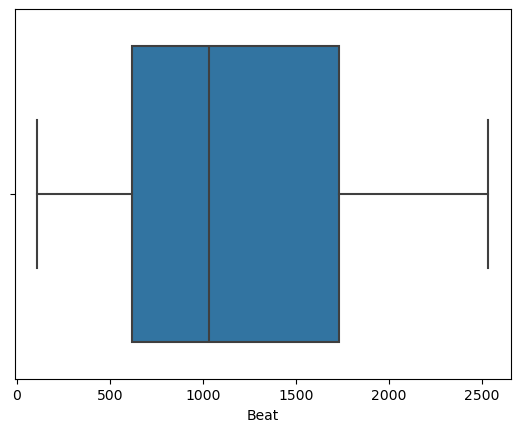

In [28]:
[akj.outliers(chicago, 'Beat'),
akj.viz_outliers(chicago, 'Beat')]

[Index([], dtype='int64'), None]

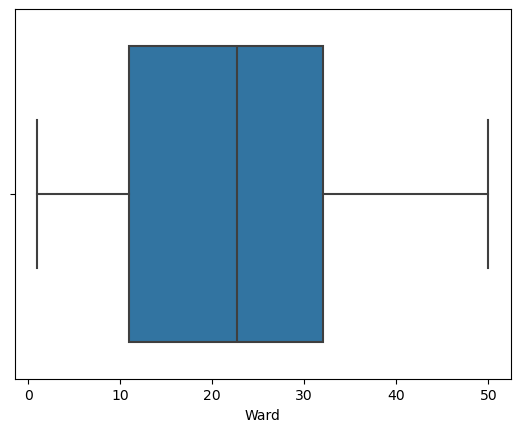

In [29]:
[akj.outliers(chicago, 'Ward'),
akj.viz_outliers(chicago, 'Ward')]

[Index([], dtype='int64'), None]

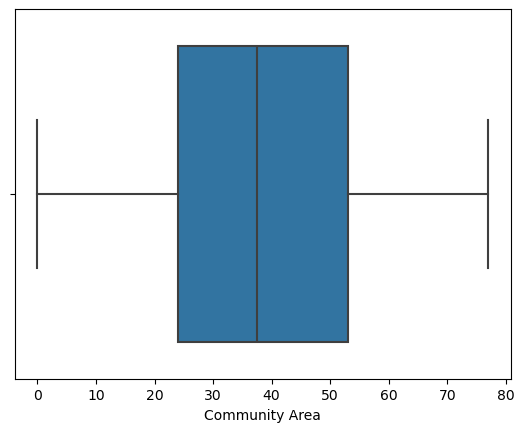

In [30]:
[akj.outliers(chicago, 'Community Area'),
akj.viz_outliers(chicago, 'Community Area')]

In [31]:
chicago.head(1000)

ID                Date                                Block  IUCR  \
0      6407111 2008-07-26 14:30:00                 085XX S MUSKEGON AVE  1320   
1     11398199 2018-07-31 10:57:00                    092XX S ELLIS AVE  143C   
2      5488785 2007-04-27 10:30:00                    062XX N TRIPP AVE  0610   
3     11389116 2018-07-23 08:55:00                   0000X N KEELER AVE  0560   
4     12420431 2021-07-11 06:40:00                  016XX W HARRISON ST  051A   
5      1699235 2001-08-21 00:00:00                        003XX W 28 PL  0810   
6      5061155 2006-10-14 22:00:00                  006XX S CENTRAL AVE  0320   
7      9876456 2014-12-02 11:48:00                  043XX W POTOMAC AVE  1811   
8      7582927 2010-06-30 01:00:00                   032XX W PIERCE AVE  0910   
9     10566046 2016-06-18 23:15:00               021XX N CALIFORNIA AVE  1811   
10     9466303 2014-01-18 09:00:00                  031XX W WARREN BLVD  2014   
11     6577203 2008-10-26 17:00:00                   058XX S KEDZIE AVE  0486   
12     8373423 2011-11-19 09:00:00                014XX N ELK GROVE AVE  0620   
13     3298634 2004-04-25 16:00:00                   076XX S HALSTED ST  2830   
14     8699049 2012-07-10 07:59:00                  042XX S INDIANA AVE  1506   
15     9522880 2014-03-09 12:30:00                   019XX W MADISON ST  1121   
16    10135550 2015-06-28 03:50:00                    047XX W FULTON ST  0486   
17     3447250 2004-07-23 00:00:00                     009XX W GRACE ST  0820   
18     2681993 2003-04-06 15:00:00                    002XX N LOREL AVE  2027   
19     1932758 2002-01-02 17:00:00                     023XX S STATE ST  0460   
20     7315747 2010-01-14 01:00:00                  022XX N NATCHEZ AVE  1320   
21     2409901 2002-10-19 21:15:00                  133XX S BRANDON AVE  0460   
22     2265520 2002-07-29 11:23:05                036XX S LAKE PARK AVE  0930   
23     6593888 2008-10-23 20:00:00                 003XX S MICHIGAN AVE  0820   
24    10473781 2016-04-04 14:34:00                      001XX W 72ND ST  141A   
25     3376825 2004-06-13 06:00:00                 078XX S PHILLIPS AVE  0910   
26    11143513 2017-11-08 13:10:00                   025XX W BERWYN AVE  0560   
27     3682751 2004-09-05 18:00:00                    077XX S PEORIA ST  1130   
28     9365306 2013-10-26 13:45:00                 008XX N MICHIGAN AVE  0870   
29     7763508 2010-09-30 21:00:00                  0000X W DIVISION ST  1152   
30     1496484 2001-03-20 00:01:00                   065XX S JUSTINE ST  1120   
31     2718013 2003-05-06 22:30:00                    065XX S ELLIS AVE  3960   
32    12037807 2020-04-26 13:55:00             053XX W BLOOMINGDALE AVE  0486   
33    12592835 2022-01-15 03:59:00                  011XX S WESTERN AVE  1310   
34    12252122 2020-12-19 00:00:00                  005XX W DIVISION ST  0890   
35     7712225 2010-09-16 12:00:00                  059XX S KEDVALE AVE  0620   
36    10348890 2015-12-16 17:00:00                   031XX S HALSTED ST  2027   
37     7533272 2010-05-31 17:00:00                   001XX S PULASKI RD  0486   
38    11366391 2018-07-01 23:55:00                    001XX N DAMEN AVE  0486   
39     3332372 2004-05-18 16:30:00                    048XX N AVERS AVE  0910   
40    11846180 2019-09-30 21:20:00                     007XX W 103RD ST  0430   
41     2875093 2003-07-29 10:08:00                   029XX S FEDERAL ST  2014   
42     4529992 2006-01-08 06:55:00                 077XX S PHILLIPS AVE  0460   
43     2275373 2002-08-03 04:00:00                   016XX W ADDISON ST  0320   
44     4166383 2005-07-18 15:15:00                      003XX E 55TH PL  1310   
45    10833453 2017-01-30 12:00:00                   0000X E MADISON ST  0890   
46     4000935 2005-05-16 22:45:00                  029XX S DEARBORN ST  0460   
47    10268476 2015-10-09 16:30:00                   029XX W ADDISON ST  0486   
48    11913974 2019-12-06 23:37:00         

In [32]:
chicago.shape

(2254741, 24)

# Summary Statistics

In [33]:
# we can use mode to find the year with the most crimes
chicago.Year.mode()

0    2001
Name: Year, dtype: int32

In [34]:
# we can use mode to find the latitude and Longitude with most crimes
chicago.Latitude.mode()

0    41.97629
Name: Latitude, dtype: float64

In [35]:
chicago.Longitude.mode()

0   -87.905227
Name: Longitude, dtype: float64

In [36]:
chicago.Location.mode()

0    (41.976290414, -87.905227221)
Name: Location, dtype: object

In [37]:
chicago.District.mean()

11.288242635668015

In [38]:
chicago.Ward.mean()

22.717432844710952

In [39]:
chicago['Community Area'].mean()

37.53730114356843

# Univariate Analysis: Non-Graphical

    - df.count()
    - df.mean()
    - df.std()
    - df.min()
    - df.quantile([0.25, 0.5, 0.75], axis = 0)
    - df.median()
    - df.max()
    - df.mode()

In [40]:
print(chicago.Ward.describe())
print(chicago.Ward.skew())
print(chicago.Ward.kurtosis())

count    2.254741e+06
mean     2.271743e+01
std      1.326202e+01
min      1.000000e+00
25%      1.100000e+01
50%      2.272764e+01
75%      3.200000e+01
max      5.000000e+01
Name: Ward, dtype: float64
0.1800669581072696
-0.8854729286411502


In [41]:
print(chicago['Community Area'].describe())
print(chicago['Community Area'].skew())
print(chicago['Community Area'].kurtosis())

count    2.254741e+06
mean     3.753730e+01
std      2.064607e+01
min      0.000000e+00
25%      2.400000e+01
50%      3.752140e+01
75%      5.300000e+01
max      7.700000e+01
Name: Community Area, dtype: float64
0.1864984521157285
-0.9384402115067076


In [42]:
print(chicago.Beat.describe())
print(chicago.Beat.skew())
print(chicago.Beat.kurtosis())

count    2.254741e+06
mean     1.186136e+03
std      7.026159e+02
min      1.110000e+02
25%      6.210000e+02
50%      1.034000e+03
75%      1.731000e+03
max      2.535000e+03
Name: Beat, dtype: float64
0.39008148848667645
-0.9563542501381117


# Univariate Analysis: Graphical
    - histogram
    - density plot
    - box plot
    - violin plot

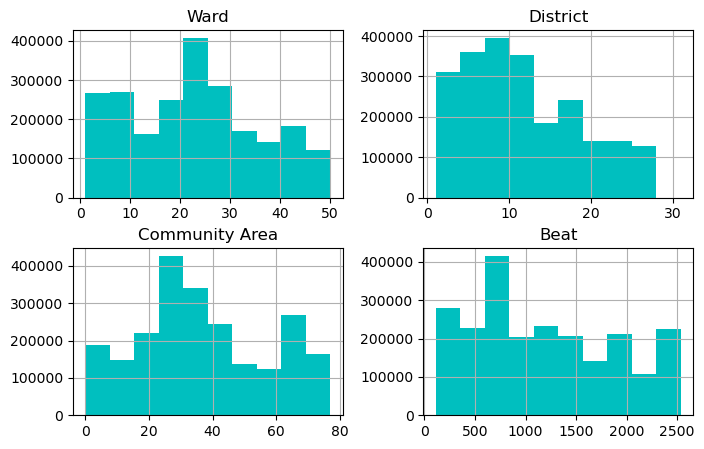

In [43]:
features = ['Ward', 'District', 'Community Area' ,'Beat'] # create a list of all numerical features
chicago[features].hist(figsize=(8,5), color='c');

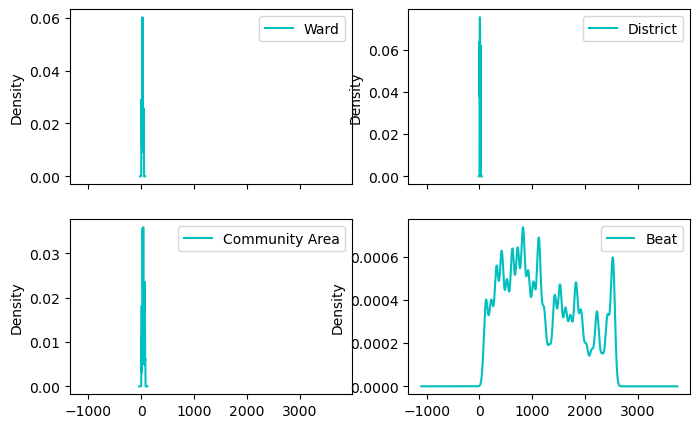

In [44]:
features = ['Ward', 'District', 'Community Area' ,'Beat'] # create a list of all numerical features
chicago[features].plot(kind='density',subplots=True, layout=(2, 2),figsize=(8,5), color='c');

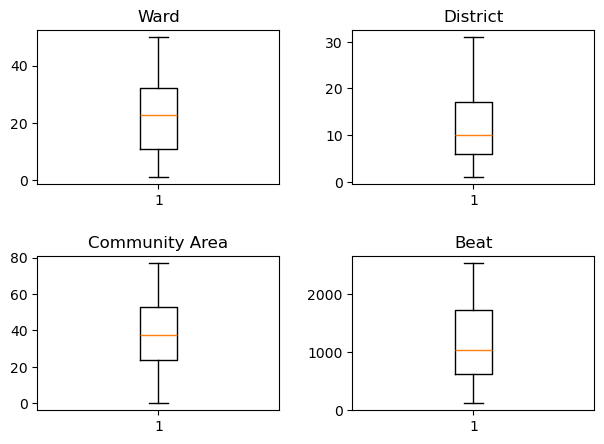

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].boxplot(x='Ward', data=chicago)
axes[0,0].set_title('Ward')

axes[0,1].boxplot(x='District', data=chicago)
axes[0,1].set_title('District')

axes[1,0].boxplot(x='Community Area', data=chicago)
axes[1,0].set_title('Community Area')

axes[1,1].boxplot(x='Beat', data=chicago)
axes[1,1].set_title('Beat')

#plt.xticks(rotation=90)
plt.tight_layout(pad=2)
plt.show;

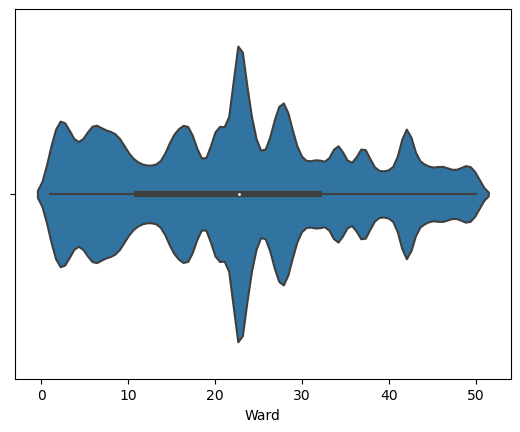

In [46]:
sns.violinplot(x='Ward', data=chicago);

# Multivariate Analysis: Graphical

    - Heatmap
    - Scatter Plot
    - Pair Plot
    - Joint Plot
    - Bubble Plot

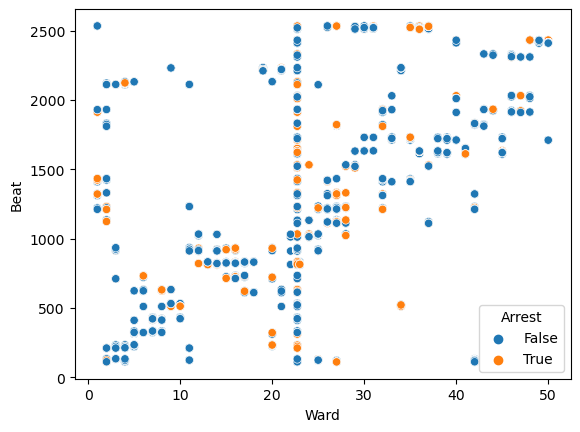

In [47]:
sns.scatterplot(x='Ward',y='Beat',hue='Arrest', data=chicago);

In [ ]:
sns.pairplot(chicago, hue="Arrest");

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_2488\205711013.py", line 1, in <module>
    sns.pairplot(chicago, hue="Arrest");
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py", line 2158, in pairplot
    plotter(scatterplot, **plot_kws)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py", line 1421, in map_offdiag
    self.map_upper(func, **kwargs)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py", line 1404, in map_upper
    self._map_bivariate(func, indices, **kwargs)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py", line 1568, in _map_bivariate
    self._plot_bivariate(x_var, y_var, ax, func, **kws)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgr

Error in callback <function _draw_all_if_interactive at 0x0000020BC341AFC0> (for post_execute), with arguments args (),kwargs {}:


MemoryError: 

In [ ]:
chicago.head(10)

In [ ]:
#chicago.groupby('Location Description')
chicago.groupby('Location Description')['Ward'].count()

# ANALYSIS

## 1 - Crime trends over the years

In [ ]:
# Crime counts for the years
count_year = chicago.groupby("Year")['Year'].count()
count_year

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.plot(count_year.index, count_year.values, marker= 'o', color= 'c')
plt.xlabel('Years')
plt.ylabel('Crime Count for each year ')
plt.title('Yearly Crime Count');

## 2 - Crime Trends over the Day

In [ ]:
count_day = chicago.groupby('Day')['Day'].count()
count_day

In [ ]:
'''days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
counts = count_day.values.sort_values()


sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.plot(days, counts, marker= '*', color='c')
plt.xlabel('Days')
plt.ylabel('Crime Count for each Day')
plt.title('Total Number of Crimes that happened each days of the week');
'''

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
counts = [306694, 318363, 322259, 324457, 320678, 339022, 323268]

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.plot(days, counts, color='c', marker='*')
plt.xlabel('Day of the Week')
plt.ylabel('Crime Count for each Dayâ€‹')
plt.title('Total Number of Crimes that happened each days of the week')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3 - What are the most common location description where crimes occur?

In [ ]:
loc_description = chicago.groupby('Location Description')['Location Description'].count().sort_values(ascending=False).head(10)
loc_description
# Because the unique values are too much and will not be able to contain the chat i would be plotting, I'll limit the result to the top 10

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.bar(loc_description.index, loc_description.values, color='c', edgecolor='k')
plt.xlabel('Location Description')
plt.xticks(rotation= 90)
plt.ylabel('Crime Count for each each location description')
plt.title('most common location description');

## 4 - What proportion of reported crimes result in arrests

In [ ]:
chicago.head(1)

In [ ]:
arrested = chicago.groupby(['Arrest'])['Primary Type'].count()
arrested

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (5,5))
plt.bar(arrested.index, arrested.values, color='c', edgecolor='k')
plt.xlabel('Arrest')
#plt.xticks(rotation= 90)
plt.ylabel('Proportion of arrest')
plt.title('proportion of reported crimes result in arrests')
plt.show();

In [ ]:
arrest = chicago.groupby(['Arrest'])['Primary Type'].count()

colors = ['cyan', 'pink']
exp = [0,0.1]
labels = ['False', 'True']

plt.figure(figsize=(4,4))
plt.pie(arrest.values, colors=colors, labels=labels, explode=exp, wedgeprops={'edgecolor':'k'}, shadow=True)
plt.title('proportion of reported crimes that results in an arrest')
plt.legend(labels=arrest.index);

## 5 - What are the most frequent types of crimes reported

In [ ]:
types_of_crimes = chicago.groupby('Primary Type')['Primary Type'].count().sort_values(ascending=False)
types_of_crimes

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
plt.bar(types_of_crimes.index, types_of_crimes.values, color='c', edgecolor='k')
plt.xlabel('Crime Type')
plt.xticks(rotation= 90)
plt.ylabel('Crime Count for each each crime')
plt.title('most frequent types of crimes reported');

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].plot(count_year.index, count_year.values, marker= 'o', color= 'c')
axes[0,0].set_title('Yearly Crime Count')

axes[0,1].plot(days, counts, marker= '*', color='c')
axes[0,1].set_title('Crimes per weekday')

axes[1,0].pie(arrest.values, colors=colors, labels=labels, explode=exp, wedgeprops={'edgecolor':'k'}, shadow=True)
axes[1,0].set_title('Proportion of arrest')

axes[1,1].bar(types_of_crimes.index, types_of_crimes.values, color='c', edgecolor='k')
axes[1,1].set_title('Frequent types of crimes')

#plt.xticks(rotation=90)
plt.tight_layout(pad=2)
plt.show;